In [16]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 載入資料

In [35]:
data = pd.read_csv("C:/Users/wei/Documents/碩士/碩一/機器學習/lm.csv")

In [36]:
data

,o,營運/營業收入淨額,現金流/營業收入淨額,負債比率,ROE,總資產週轉次數,f,成長率
0,1101.0,0.273499,0.449722,43.82,11.93,0.30,0.0,-0.163516
1,1102.0,0.245377,0.324144,42.82,10.36,0.27,0.0,-0.186907
2,1103.0,0.257883,1.640086,38.45,8.78,0.05,0.0,-0.530041
3,1104.0,0.186904,0.054304,22.06,7.26,0.23,1.0,0.397108
4,1108.0,0.183670,0.070756,41.99,8.84,0.59,1.0,3.222900
...,...,...,...,...,...,...,...,...
2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.578126
2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.122107
2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36.902362
2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.798247


# 變更欄位名稱

In [38]:
data.columns = ['ID','operating income','cash flow','debt ratio','ROE','total asset turnover','+/-','growth rate']

In [39]:
data

,ID,operating income,cash flow,debt ratio,ROE,total asset turnover,+/-,growth rate
0,1101.0,0.273499,0.449722,43.82,11.93,0.30,0.0,-0.163516
1,1102.0,0.245377,0.324144,42.82,10.36,0.27,0.0,-0.186907
2,1103.0,0.257883,1.640086,38.45,8.78,0.05,0.0,-0.530041
3,1104.0,0.186904,0.054304,22.06,7.26,0.23,1.0,0.397108
4,1108.0,0.183670,0.070756,41.99,8.84,0.59,1.0,3.222900
...,...,...,...,...,...,...,...,...
2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.578126
2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.122107
2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36.902362
2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.798247


# 資料簡述

In [32]:
data.describe()

,ID,operating income,Cash flow,Debt ratio,ROE,Total asset turnover,+/-,growth rate
count,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,2027.000000
mean,7406.410987,-4.713451,8.431179,43.381150,2.833688,0.709802,0.343337,3.810277
std,50077.297014,141.277969,114.187236,19.602071,70.321140,0.523506,0.474944,155.118094
min,1101.000000,-5958.750000,0.000338,0.380000,-2729.470000,0.000000,0.000000,-2078.033079
25%,2605.250000,0.016696,0.085140,28.782500,-0.535000,0.370000,0.000000,-1.479491
50%,4529.500000,0.097691,0.259935,43.495000,6.955000,0.630000,0.000000,-0.765028
75%,6487.500000,0.188526,0.840975,57.330000,14.355000,0.930000,1.000000,0.772140
max,912000.000000,292.833983,3378.373333,99.220000,681.230000,5.130000,1.000000,4679.960887


# 相關係數表

In [33]:
data_correlations = data.drop(['ID','+/-'], axis=1).corr(method='pearson')
data_correlations

,operating income,Cash flow,Debt ratio,ROE,Total asset turnover,growth rate
operating income,1.000000,-0.776480,-0.011289,-0.004347,-0.023857,0.000748
Cash flow,-0.776480,1.000000,-0.002618,0.006341,0.017783,-0.002126
Debt ratio,-0.011289,-0.002618,1.000000,-0.104526,0.157167,0.020696
ROE,-0.004347,0.006341,-0.104526,1.000000,0.120490,-0.002006
Total asset turnover,-0.023857,0.017783,0.157167,0.120490,1.000000,0.018097
growth rate,0.000748,-0.002126,0.020696,-0.002006,0.018097,1.000000


In [21]:
import seaborn as sns

# 相關係數熱圖

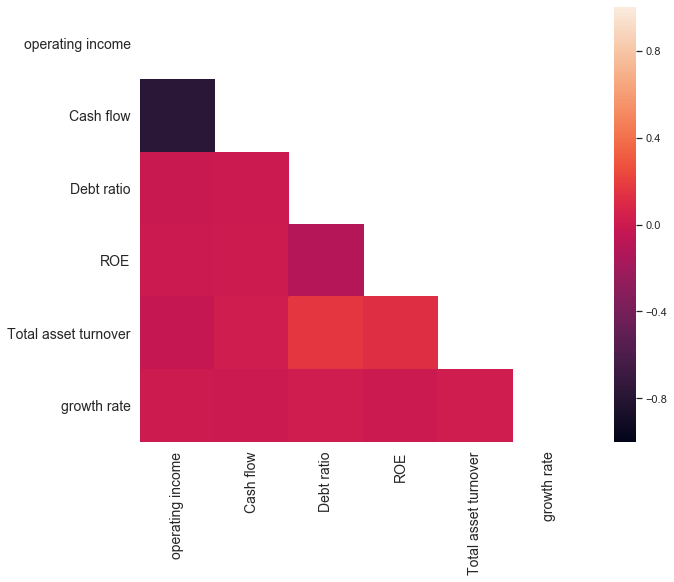

In [34]:
fig, ax = plt.subplots(figsize=(10, 8));

mask = np.zeros_like(data_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data_correlations, vmin=-1, vmax=1, mask=mask, ax=ax);

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

plt.show();